# Jupyter workflow step by step

> The classic Jake Vanderplas 'Jupyter Data Science Workflow', remastered using `nbdev`.

## Workflow

### Get data
https://data.seattle.gov

In [14]:
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [15]:
from urllib.request import urlretrieve

In [16]:
urlretrieve(FREMONT_URL, filename="Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x15c9b8220>)

In [17]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


### Read into pandas dataframe

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("Fremont.csv")

In [20]:
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


### Set `Date` column as index

In [21]:
data = pd.read_csv("Fremont.csv", index_col="Date")
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
10/03/2012 12:00:00 AM,13.0,4.0,9.0
10/03/2012 01:00:00 AM,10.0,4.0,6.0
10/03/2012 02:00:00 AM,2.0,1.0,1.0
10/03/2012 03:00:00 AM,5.0,2.0,3.0
10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [22]:
data.index

Index(['10/03/2012 12:00:00 AM', '10/03/2012 01:00:00 AM',
       '10/03/2012 02:00:00 AM', '10/03/2012 03:00:00 AM',
       '10/03/2012 04:00:00 AM', '10/03/2012 05:00:00 AM',
       '10/03/2012 06:00:00 AM', '10/03/2012 07:00:00 AM',
       '10/03/2012 08:00:00 AM', '10/03/2012 09:00:00 AM',
       ...
       '01/31/2023 02:00:00 PM', '01/31/2023 03:00:00 PM',
       '01/31/2023 04:00:00 PM', '01/31/2023 05:00:00 PM',
       '01/31/2023 06:00:00 PM', '01/31/2023 07:00:00 PM',
       '01/31/2023 08:00:00 PM', '01/31/2023 09:00:00 PM',
       '01/31/2023 10:00:00 PM', '01/31/2023 11:00:00 PM'],
      dtype='object', name='Date', length=90552)

### Parse dates

In [23]:
data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)

In [24]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [25]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2023-01-31 14:00:00', '2023-01-31 15:00:00',
               '2023-01-31 16:00:00', '2023-01-31 17:00:00',
               '2023-01-31 18:00:00', '2023-01-31 19:00:00',
               '2023-01-31 20:00:00', '2023-01-31 21:00:00',
               '2023-01-31 22:00:00', '2023-01-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=90552, freq=None)

### First plot

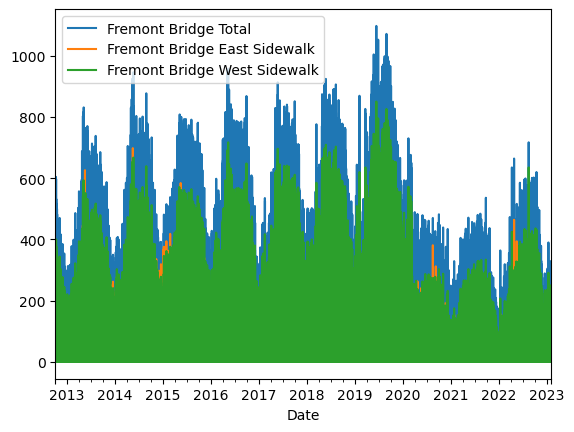

In [26]:
data.plot();

### Resample by week

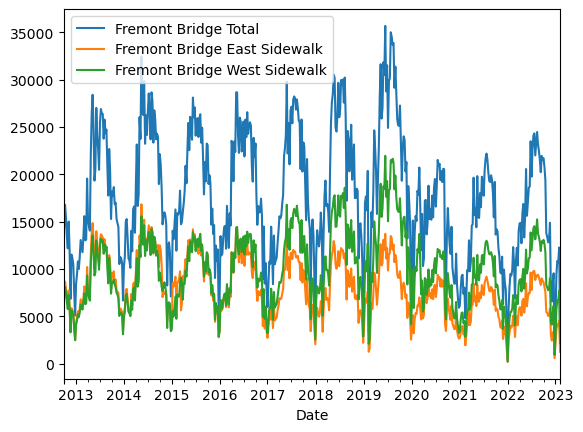

In [27]:
data.resample('W').sum().plot();

### Change plotting style to seaborn

In [28]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

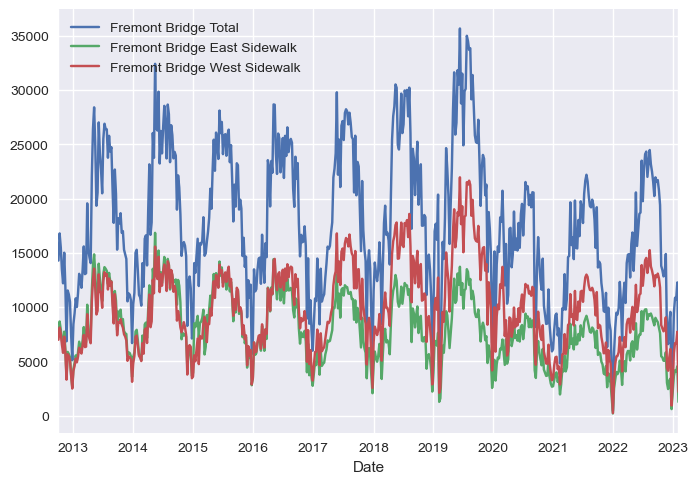

In [29]:
data.resample('W').sum().plot();

### Shorten column names for shorter legend

In [30]:
data.columns=['Total', 'East', 'West']

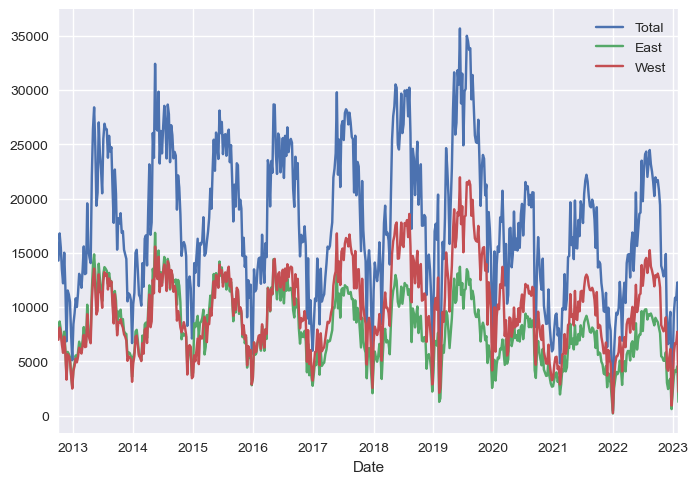

In [31]:
data.resample('W').sum().plot();

### Rolling sum

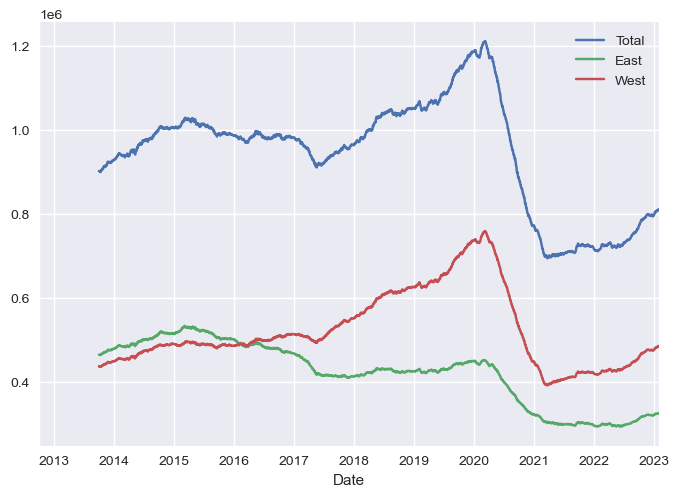

In [32]:
data.resample('D').sum().rolling(365).sum().plot();

### Set y axis to start from 0

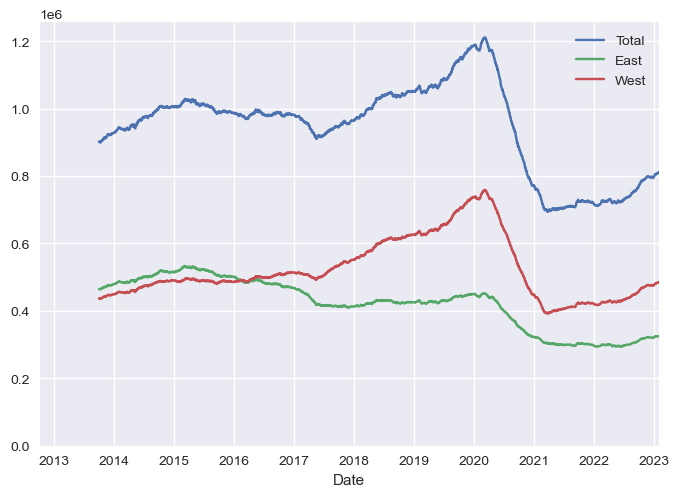

In [33]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

### Groupby time of day

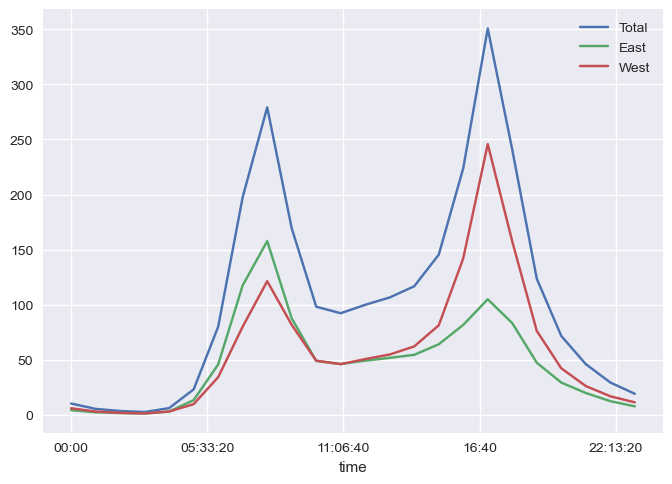

In [34]:
data.groupby(data.index.time).mean().plot();

### Pivot data

In [37]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


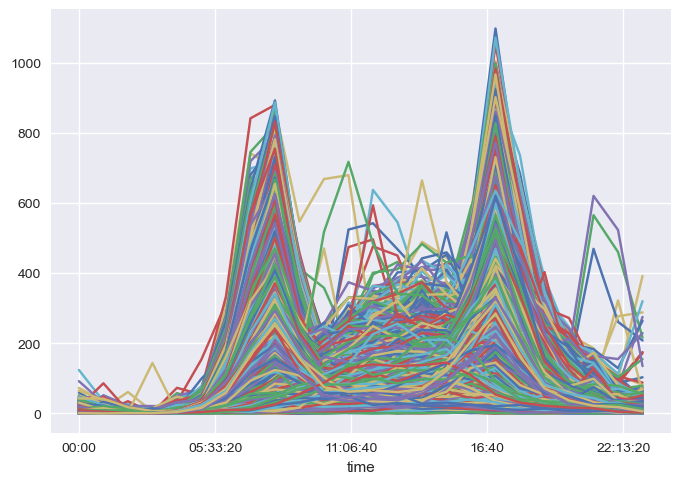

In [38]:
pivoted.plot(legend=False);

### Add transparency

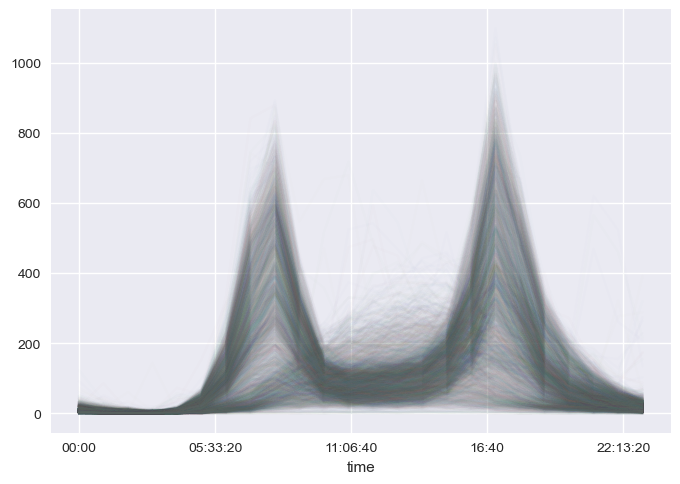

In [40]:
pivoted.plot(legend=False, alpha=0.01);

## Code so far

In [1]:
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(FREMONT_URL, filename="Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x1040c7f40>)

In [3]:
import pandas as pd
data = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [4]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

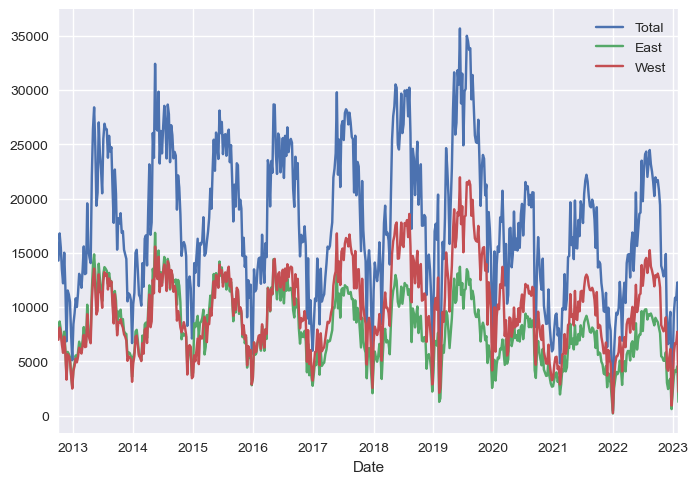

In [5]:
data.columns=['Total', 'East', 'West']
data.resample('W').sum().plot();

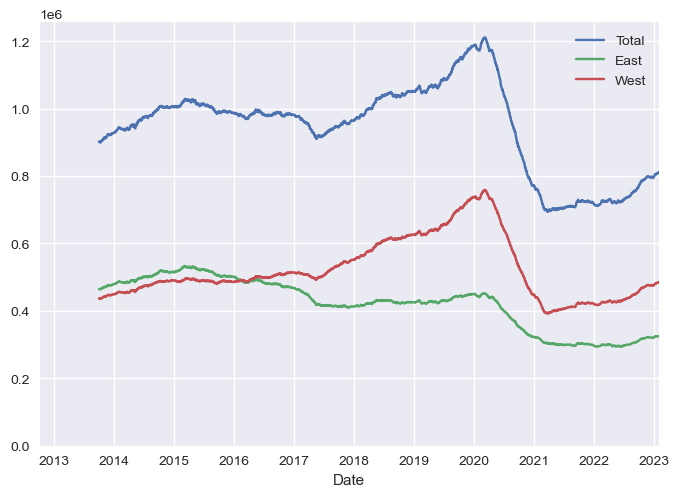

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

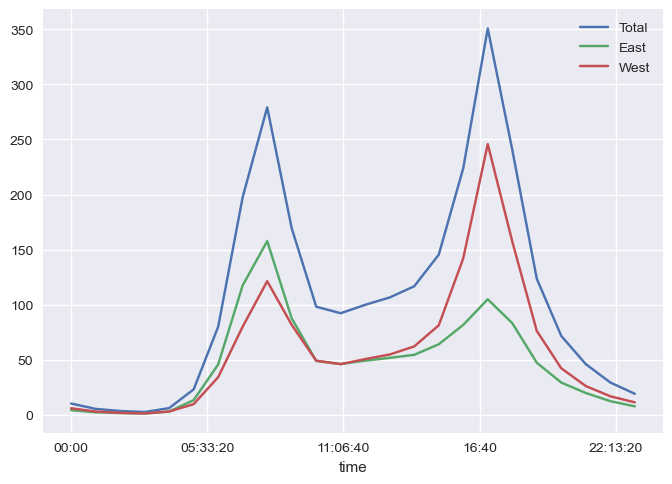

In [7]:
data.groupby(data.index.time).mean().plot();

In [11]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


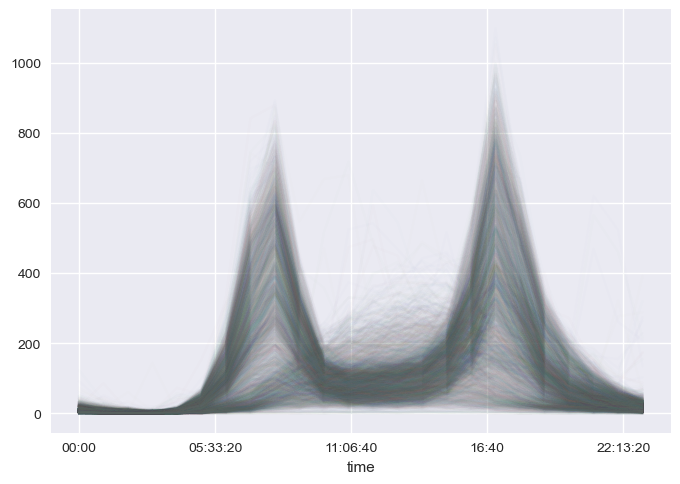

In [9]:
pivoted.plot(legend=False, alpha=0.01);

## Restart and run all

## git commit

### create repo and push

### add csv file to .gitignore

## Create data download function and clean code again

In [4]:
from pathlib import Path
from urllib.request import urlretrieve

import pandas as pd


FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL, force_download=False):
    if force_download or not Path(filename).exists():
        urlretrieve(url, filenmae)
    data = pd.read_csv(filename, index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East', 'West']
    return data

In [5]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

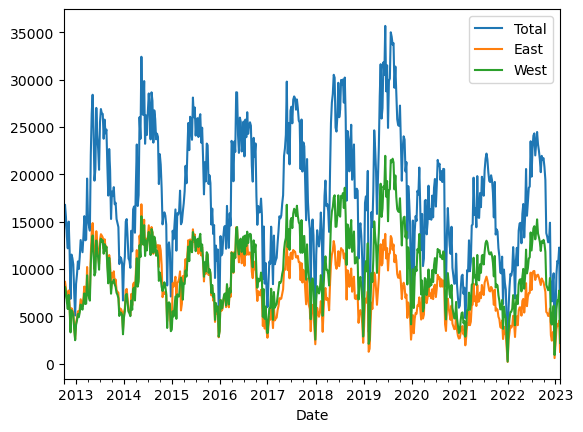

In [6]:
data.resample('W').sum().plot();

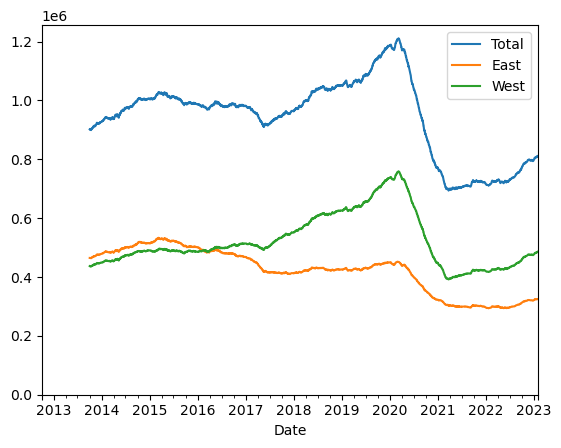

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

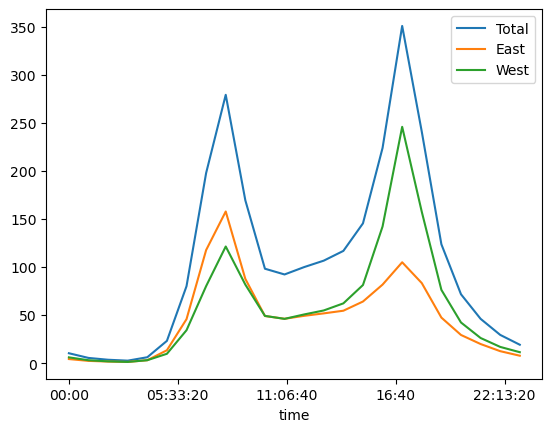

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


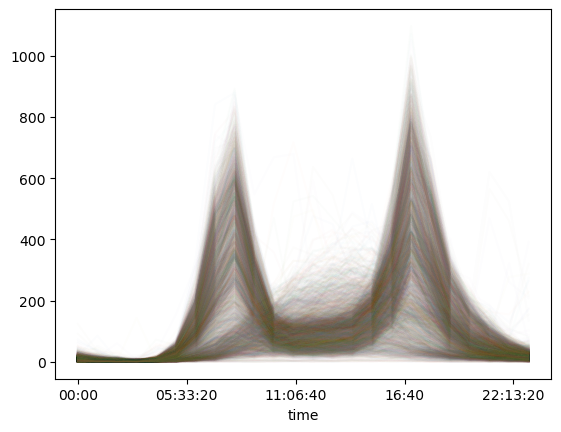

In [10]:
pivoted.plot(legend=False, alpha=0.01);

### restart and run all, git commit, git push

## Move download data function and move to a package

In [5]:
from pathlib import Path
from urllib.request import urlretrieve

import pandas as pd

FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'


def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL,
                     force_download=False):
    """Download and cache the fremont data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not Path(filename).exists():
        urlretrieve(url, filenmae)
    data = pd.read_csv(filename, index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East', 'West']
    return data

In [6]:
data = get_fremont_data()

In [7]:
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


## Enter nbdev!

In [8]:
#| default_exp data

In [9]:
#| hide
from nbdev.showdoc import *

In [10]:
#| export
from pathlib import Path
from urllib.request import urlretrieve

import pandas as pd

In [11]:
#| export
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [12]:
#| export
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL,
                     force_download=False):
    """Download and cache the fremont data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not Path(filename).exists():
        urlretrieve(url, filenmae)
    data = pd.read_csv(filename, index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East', 'West']
    return data

In [13]:
#| hide
import nbdev; nbdev.nbdev_export()

### Git commit and push

## pip install -e '.[dev]'

## Tests

In [24]:
data = get_fremont_data()

In [25]:
assert all(data.columns == ['Total', 'East', 'West'])

In [26]:
assert isinstance(data.index, pd.DatetimeIndex)

In [ ]:
assert len(np.unique(data.index.time)) == 24

### Git commit and push

## Refactor data download

In [ ]:
    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)

In [23]:
#| export
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL,
                     force_download=False):
    """Download and cache the fremont data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not Path(filename).exists():
        urlretrieve(url, filenmae)
    data = pd.read_csv(filename, index_col='Date')
    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)
    data.columns = ['Total', 'East', 'West']
    return data

### nbdev_export nbdev_test

### git commit and push